In [4]:
using Pkg
Pkg.activate("../../Project.toml")

using ITensors
using Plots
using Random
using Interpolations
using LegendrePolynomials

include("../RealRealHighDimension.jl")
include("../benchmarking/benchUtils.jl")

  Activating project at `~/Documents/QML Project/QuantumInspiredML`


expand_dataset (generic function with 1 method)

In [5]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_splits_txt("../datasets/ECG_train.txt", 
"../datasets/ECG_val.txt", "../datasets/ECG_test.txt");
X_train = vcat(X_train, X_val);
y_train = vcat(y_train, y_val);

scaler = fit_scaler(RobustSigmoidTransform, X_train; range=Options(encoding=Basis("Fourier")).encoding.range);
    X_train_scaled = transform_data(scaler, X_train)
    X_val_scaled = transform_data(scaler, X_val)
    X_test_scaled = transform_data(scaler, X_test);

In [16]:
hists = [histogram(x,bins=20, xlims=[0,1]) for x in eachcol(X_train_scaled)];

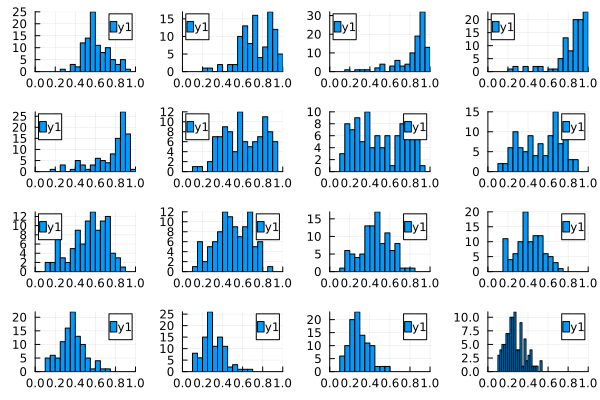

In [17]:
plot(hists[1:16]...)

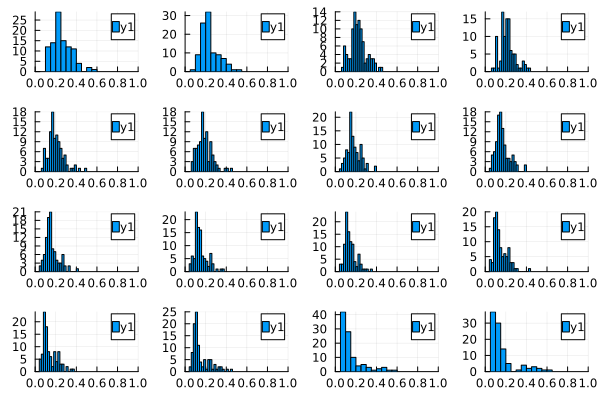

In [94]:
plot(hists[17:32]...)

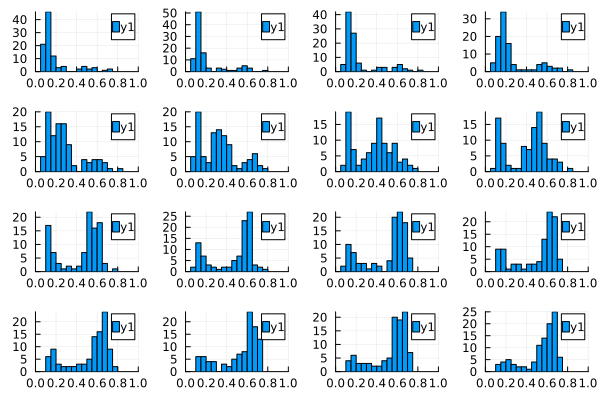

In [95]:
plot(hists[33:48]...)

In [97]:
xs = -1:1/500:1

ds = 1:5
pls = []
for i in ds
    global ys = [Pl(x, i; norm = Val(:normalized)) for x in xs]
    push!(pls, plot(xs,ys))
end

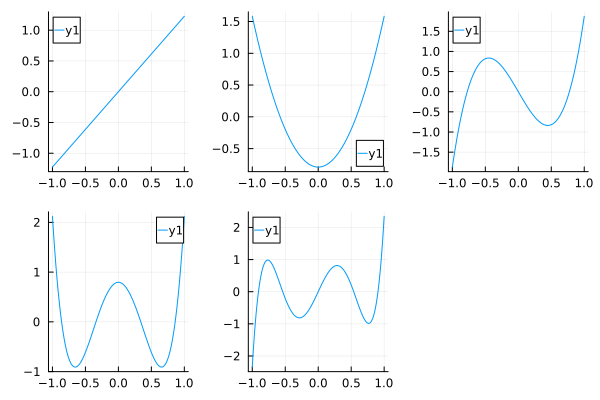

In [98]:
plot(pls...)

In [99]:
i = 1
ys =  [Pl(x, i; norm = Val(:normalized)) for x in xs]

1001-element Vector{Float64}:
 -1.224744871391589
 -1.2222953816488058
 -1.2198458919060227
 -1.2173964021632393
 -1.2149469124204562
 -1.212497422677673
 -1.2100479329348899
 -1.2075984431921067
 -1.2051489534493236
 -1.2026994637065402
  ⋮
  1.2051489534493236
  1.2075984431921067
  1.2100479329348899
  1.212497422677673
  1.2149469124204562
  1.2173964021632393
  1.2198458919060227
  1.2222953816488058
  1.224744871391589

In [100]:
function plot_hists(data,bins)
    nbins = length(bins) - 1
    h1 = histogram(data,bins=0:1/nbins:1, xlim=[0,1], title="Base Hist",color=:red,)
    scatter!(data,[5 for _ in data], label="Raw Data", color=:black, markershape=:xcross, legend=:none)
    
    h2 = histogram(data, bins=bins, xlim=[0,1], label="Scaled", title = "Scaled Hist")
    scatter!(data,[5 for _ in data], label="Raw Data", color=:black, markershape=:xcross, legend=:none)
    return plot(h1,h2, layout=(2,1), size=(600,400))
end

function make_bins_old(data, nbins)
    npt = length(data)
    A = sort(data)
    A_x = 0:(npt-1)
    nodes = (A_x,)
    itp = interpolate(nodes, A, Gridded(Linear()));
    xs = collect(0:npt/(nbins):(npt-1))
    bins = [itp(x) for x in xs]
    bins[1] = 0
    bins[end] = 1
    return bins
end

function make_bins(data, nbins)
    npts = length(data)
    bin_pts = Int(round(npts/nbins))

    bins = Vector{eltype(data)}(undef, nbins+1)
    bins[1] = 0
    j = 2
    ds = sort(data)
    for (i,x) in enumerate(ds)
        if i % bin_pts == 0 && i < length(data)
            bins[j] = (x + ds[i+1])/2
            j += 1
        end
    end
    bins[end] = 1
    return bins
end

make_bins (generic function with 1 method)

In [101]:
nbins = 12
bins = [make_bins(x,nbins) for x in eachcol(X_train_scaled)];
# bins2 = [make_bins(x,nbins) for x in eachrow(X_train_scaled)];

96-element Vector{Vector{Float64}}:
 [0.0, 0.4626533312809879, 0.4918833282117999, 0.5237239373670877, 0.552374560189385, 0.5723077005812836, 0.5868393111842196, 0.5959206057938569, 0.6253363725630623, 0.6880390443404442, 0.7301191047118321, 0.7676057864647986, 1.0]
 [0.0, 0.5427625188452322, 0.5929780441140786, 0.6366821552395939, 0.6573188696193668, 0.7093870840669959, 0.7322841015027136, 0.758830960441989, 0.8459566216677834, 0.8705881678560474, 0.890123807976884, 0.9240495955130557, 1.0]
 [0.0, 0.535113006660623, 0.6847199580691514, 0.7734837561689982, 0.8333156046588692, 0.8579682008443086, 0.8801054307641953, 0.9042129586376377, 0.9190839874533028, 0.9280999577324336, 0.9348358210431296, 0.9573913188258243, 1.0]
 [0.0, 0.5104925845935906, 0.7492544789072644, 0.7868493836377908, 0.812443098067662, 0.8600377923139906, 0.8875038055033533, 0.8990227729701746, 0.9117514986269986, 0.9308227976875639, 0.9537571643420129, 0.9628287202907377, 1.0]
 [0.0, 0.4293768821543973, 0.569937540470

In [102]:
bins[1]

13-element Vector{Float64}:
 0.0
 0.4626533312809879
 0.4918833282117999
 0.5237239373670877
 0.552374560189385
 0.5723077005812836
 0.5868393111842196
 0.5959206057938569
 0.6253363725630623
 0.6880390443404442
 0.7301191047118321
 0.7676057864647986
 1.0

In [103]:
plts = [plot_hists(x,bins[i]) for (i,x) in enumerate(eachcol(X_train_scaled))];
# plts2 = [plot_hists(x,bins2[i]) for (i,x) in enumerate(eachrow(X_train_scaled))];

96-element Vector{Plots.Plot{Plots.GRBackend}}:
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 ⋮
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}
 Plot{Plots.GRBackend() n=4}

In [104]:
bins[1]

13-element Vector{Float64}:
 0.0
 0.4626533312809879
 0.4918833282117999
 0.5237239373670877
 0.552374560189385
 0.5723077005812836
 0.5868393111842196
 0.5959206057938569
 0.6253363725630623
 0.6880390443404442
 0.7301191047118321
 0.7676057864647986
 1.0

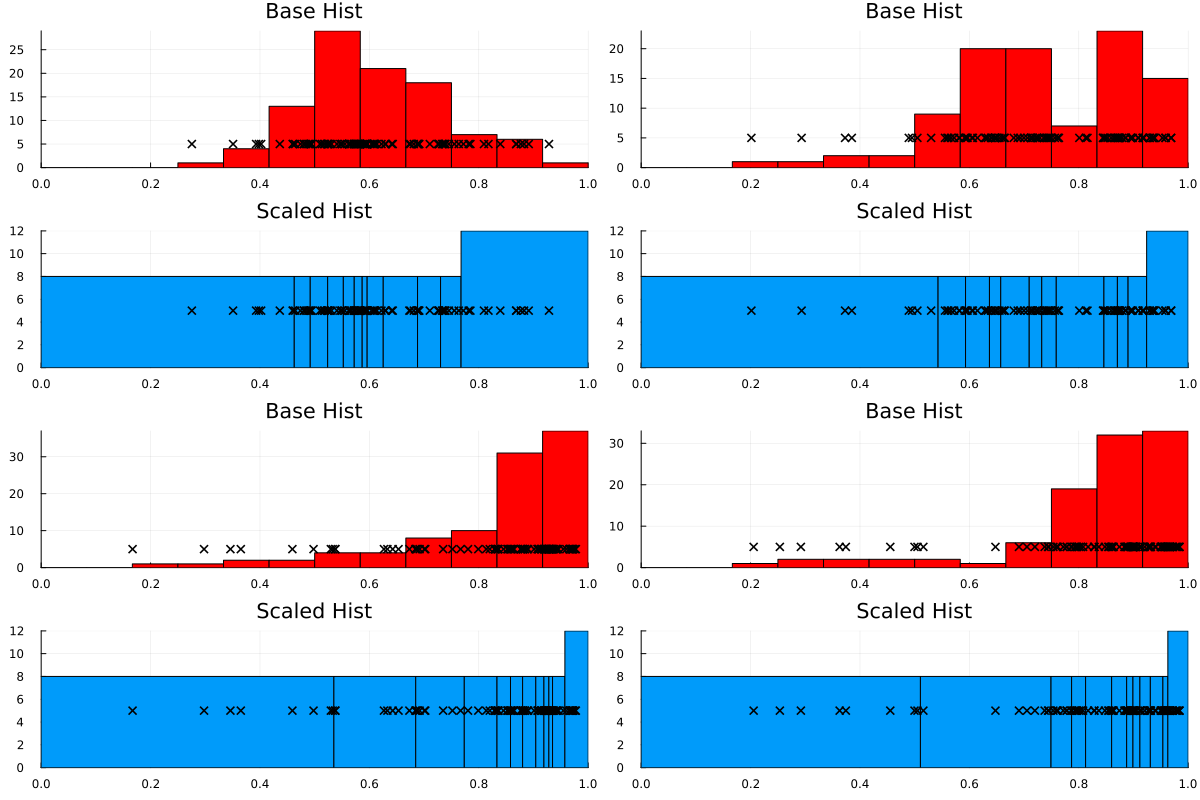

In [105]:
plot(plts[1:4]..., size=(1200,800))

In [106]:
function rect(x)
    return  abs(x) == 1/2 ? 1/2 : float(-0.5 < x < 0.5)
end

rect (generic function with 1 method)

In [107]:
function generate_rectbasis(bins::Vector{Float64}; aux::Union{Function, Vector{Function}}=identity)
    widths = diff(bins)
    if aux isa Function
        return x -> [rect((x - bins[i])/dx - 0.5)/dx for (i,dx) in enumerate(widths)]
    else
        x -> vcat([[rect((x - bins[i])/dx - 0.5)/dx * f((x-bins[i])/dx) for f in aux] for (i,dx) in enumerate(widths)]...)
    end
end

generate_rectbasis (generic function with 1 method)

In [109]:
xs = 0:1/500:1

aux = [x->1,x->cospi(2*x), x->sinpi(2*x)]

ys = Matrix{Float64}(undef, length(xs), length(aux)*(length(bins[1]) - 1))

for i in 1:size(ys,1)
    ys[i,:] = generate_rectbasis(bins[1]; aux=aux).(xs)[i]
end
#p = plot(xs, ys)


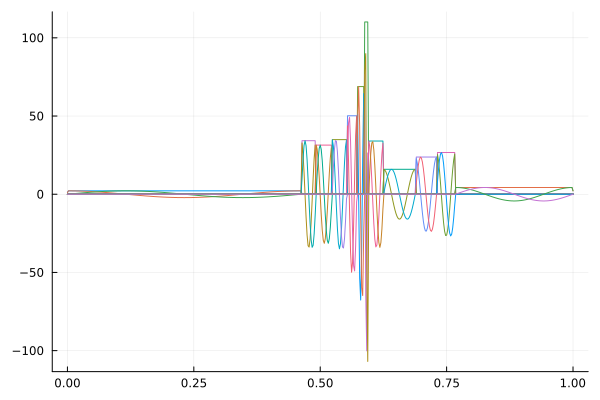

In [110]:
plot(xs,ys, legend=:none)

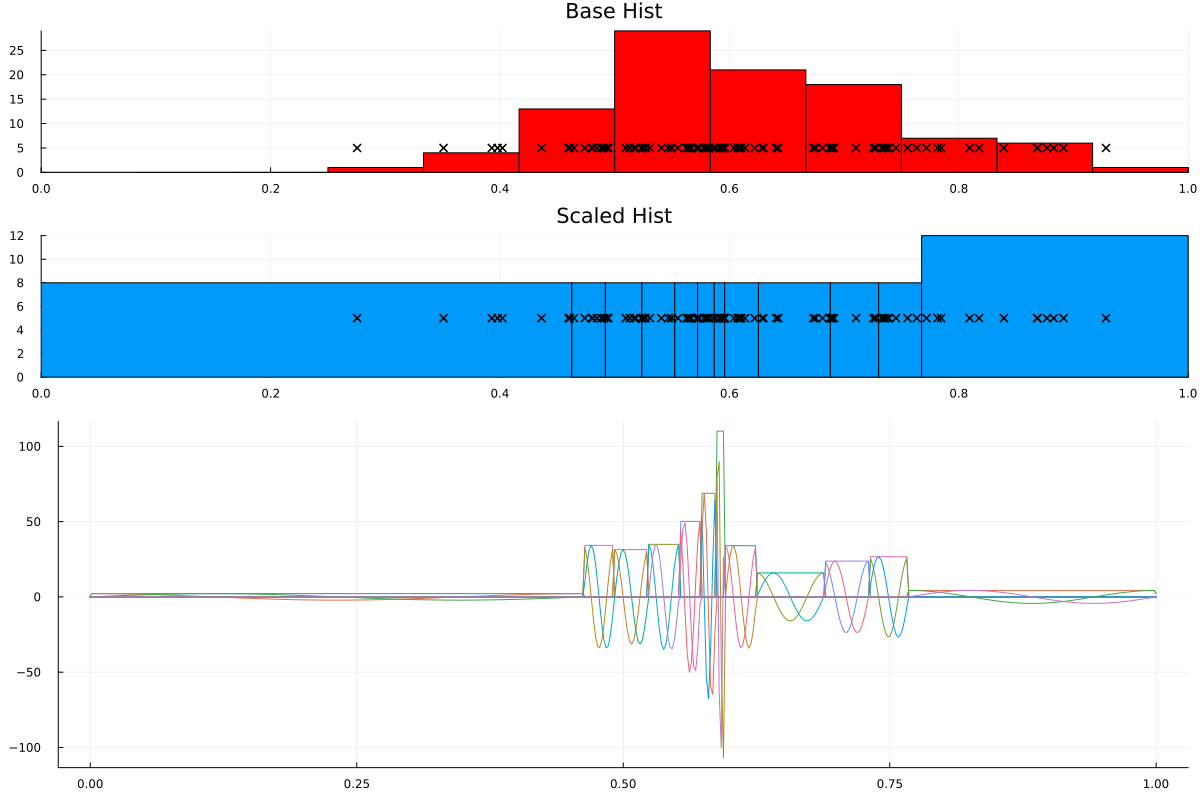

In [112]:
plot(plts[1], plot(xs,ys,legend=:none),layout=(2,1),size=(1200,800))


In [8]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_splits_txt("../datasets/ECG_train.txt", 
"../datasets/ECG_val.txt", "../datasets/ECG_test.txt");
X_train = vcat(X_train, X_val);
y_train = vcat(y_train, y_val);



setprecision(BigFloat, 128)
Rdtype = Float64

verbosity = 0
test_run = true


opts=Options(; nsweeps=5, chi_max=15,  update_iters=1, verbosity=verbosity, dtype=Complex{Rdtype}, lg_iter=KLD_iter,
bbopt=BBOpt("CustomGD"), track_cost=false, eta=0.05, rescale = (false, true), d=10, aux_basis_dim=1, encoding=SplitBasis("Hist Split", "Uniform"))

W, info, train_states, test_states, p = fitMPS(X_train, y_train, X_val, y_val, X_test, y_test; random_state=456, chi_init=4, opts=opts, test_run=test_run)



Generating initial weight MPS with bond dimension χ_init = 4
        using random state 456.


┌ Warning: Using a complex valued MPS but the encoding is real
└ @ Main /home/noodles/Documents/QML Project/QuantumInspiredML/LogLoss/RealRealHighDimension.jl:501


Initialising train states.
Initialising valid states.
Initialising test states.
Initialising test_enc states.
Encoding completed! Returning initial states without training.


(MPS
[1] ((dim=10|id=287|"Site,n=1"), (dim=4|id=453|"Link,l=1"))
[2] ((dim=10|id=238|"Site,n=2"), (dim=4|id=453|"Link,l=1"), (dim=4|id=50|"Link,l=2"))
[3] ((dim=10|id=557|"Site,n=3"), (dim=4|id=50|"Link,l=2"), (dim=4|id=79|"Link,l=3"))
[4] ((dim=10|id=383|"Site,n=4"), (dim=4|id=79|"Link,l=3"), (dim=4|id=295|"Link,l=4"))
[5] ((dim=10|id=539|"Site,n=5"), (dim=4|id=295|"Link,l=4"), (dim=4|id=743|"Link,l=5"))
[6] ((dim=10|id=185|"Site,n=6"), (dim=4|id=743|"Link,l=5"), (dim=4|id=345|"Link,l=6"))
[7] ((dim=10|id=90|"Site,n=7"), (dim=4|id=345|"Link,l=6"), (dim=4|id=648|"Link,l=7"))
[8] ((dim=10|id=291|"Site,n=8"), (dim=4|id=648|"Link,l=7"), (dim=4|id=973|"Link,l=8"))
[9] ((dim=10|id=116|"Site,n=9"), (dim=4|id=973|"Link,l=8"), (dim=4|id=42|"Link,l=9"))
[10] ((dim=10|id=858|"Site,n=10"), (dim=4|id=42|"Link,l=9"), (dim=4|id=127|"Link,l=10"))
[11] ((dim=10|id=674|"Site,n=11"), (dim=4|id=127|"Link,l=10"), (dim=4|id=384|"Link,l=11"))
[12] ((dim=10|id=260|"Site,n=12"), (dim=4|id=384|"Link,l=11"), (d

In [9]:
siteinds(W)

96-element Vector{Index{Int64}}:
 (dim=10|id=287|"Site,n=1")
 (dim=10|id=238|"Site,n=2")
 (dim=10|id=557|"Site,n=3")
 (dim=10|id=383|"Site,n=4")
 (dim=10|id=539|"Site,n=5")
 (dim=10|id=185|"Site,n=6")
 (dim=10|id=90|"Site,n=7")
 (dim=10|id=291|"Site,n=8")
 (dim=10|id=116|"Site,n=9")
 (dim=10|id=858|"Site,n=10")
 ⋮
 (dim=10|id=72|"Site,n=88")
 (dim=10|id=562|"Site,n=89")
 (dim=10|id=125|"Site,n=90")
 (dim=10|id=212|"Site,n=91")
 (dim=10|id=435|"Site,n=92")
 (dim=10|id=966|"Site,n=93")
 (dim=10|id=458|"Site,n=94")
 (dim=10|id=549|"Site,n=95")
 (dim=10|id=89|"Site,n=96")

In [32]:
# testing scaled by class
X0 = X_train_scaled[y_train .== 0,:]
X1 = X_train_scaled[y_train .== 1,:]

hists = [histogram(x,bins=20, xlims=[0,1], label="C1", norm=:probability) for x in eachcol(X0)];

hists = [histogram!(hists[i],x,bins=20, xlims=[0,1], label="C2", alpha=0.5, norm=:probability) for (i,x) in enumerate(eachcol(X1))];



In [34]:
X0

31×96 Matrix{Float64}:
 0.392923  0.201507  0.167083  0.253533  …  0.67553   0.683238  0.694438
 0.738161  0.96853   0.971721  0.950954     0.464994  0.467731  0.52466
 0.523998  0.504934  0.537928  0.705259     0.633027  0.649567  0.581152
 0.562844  0.530075  0.532995  0.647635     0.626006  0.671323  0.569606
 0.687541  0.654994  0.859665  0.951844     0.517288  0.56761   0.629571
 0.577877  0.693056  0.835774  0.901812  …  0.650997  0.646935  0.569907
 0.571453  0.628254  0.653271  0.744984     0.610879  0.606305  0.504783
 0.734832  0.867447  0.909727  0.931752     0.531816  0.577867  0.500957
 0.882749  0.894809  0.835145  0.853921     0.477603  0.493531  0.565446
 0.595972  0.712761  0.820034  0.91239      0.476651  0.518683  0.458197
 ⋮                                       ⋱                      ⋮
 0.55508   0.489229  0.345965  0.205618     0.69248   0.693512  0.677251
 0.71049   0.800975  0.766669  0.743874     0.831507  0.74763   0.545315
 0.523369  0.640769  0.734825  0.796

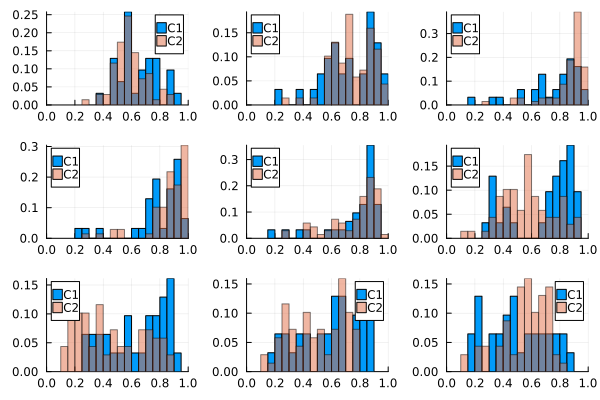

In [33]:
plot(hists[1:9]...)